# Import the necessary libraries

In [423]:
import math
import numpy as np
import matplotlib.pyplot as plt # to deal with the graphs

# Set up the constants
I'll set up a GUI here.

In [424]:
length = 0.5835     #length of the pipe (m)
rMax = 0.0067       #radius of widest end of the pipe
rho0 = 1.2         # density of air (kg/m^3)
P0 = 1.01E5        # ambient air pressure (Pa)
#print(P0)
gamma = 1.4        # for a diatomic gas
n = 400

freq = 293.33  #this is a repeated guess until p[n] goes below 0.001

p = np.zeros(shape=(401,1))  #set up the empty arrays
U = np.zeros(shape=(401,1))
X = np.zeros(shape=(401,1))
dX = length/n  #calculate the step distance


# Define functions as per Johnston's article


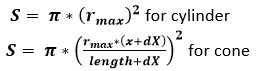



In [425]:
#function for cylinder
def cylinder_S(x):
    S = math.pi*(rMax**2)
    return S
    
    
#k = cylinder_S(2) # use print function to check variables and functions as we proceed
#print(k)

In [426]:
#function for cone
def cone_S(x):
    S = math.pi*(rMax*(x+dX)/(length+dX))**2
    return S
    
    
#l = cone_S(2)
#print(l)

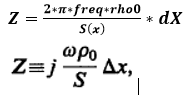

In [427]:
def func_Z(x):
    Z = dX*(2*math.pi*freq*rho0)/cone_S(x)
    return Z

#m = func_Z(2)
#print(m)




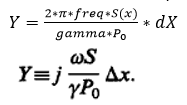

In [428]:
def func_Y(x):
    Y = dX*(2*math.pi*freq*cone_S(x))/(gamma*P0)
    return Y

#o = func_Y(2)
#print(o)

# Take the end at x = 0 to be closed
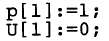

In [429]:
p[0] = 1 #Python indexes from 0; Pascal indexes from 1
U[0] = 0

#print(p[0:5]) #print first 5 values to check
#print(U[0:5])

# Start and run the loop to populate p and U

In [430]:
for i in range(1,n+1): #python index starts at 0 and ends at n+1, inclusive
    x = (i-1)*dX
    #print(x)
    Phalf = p[i-1] + 0.5*U[i-1]*func_Z(x)
    #print(Phalf)
    #print(0.5*U[i-1]*func_Z(x))
    Uhalf = U[i-1] - 0.5*p[i-1]*func_Y(x)
    #print(Uhalf)
    p[i] = p[i-1] + Uhalf*func_Z(x + dX/2)
    #print(p[i])
    U[i] = U[i-1] - Phalf*func_Y(x + dX/2)
    X[i-1] = x                             #needed for plotting the charts


# Build plots

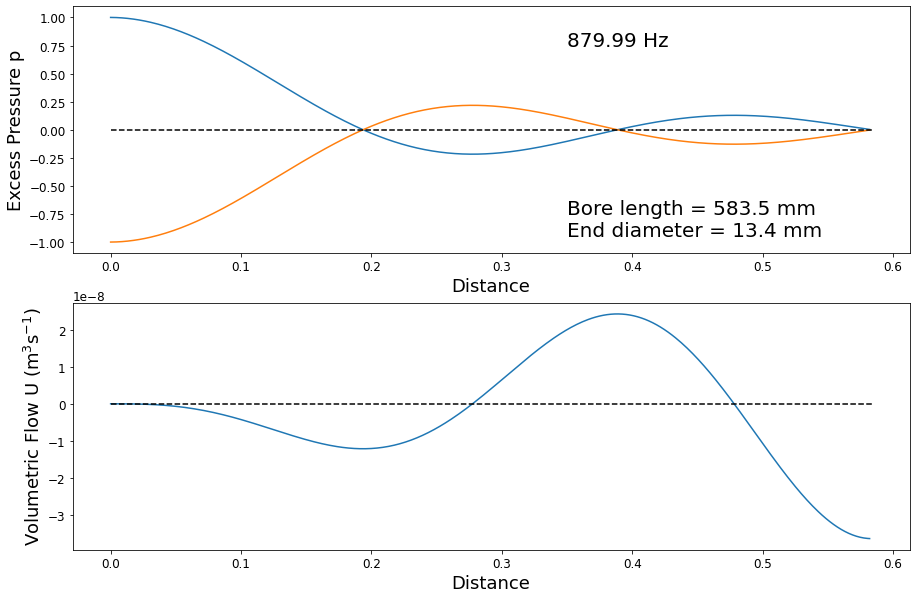

In [437]:
    plt.rc('xtick',labelsize=12) #set global tick label size
    plt.rc('ytick',labelsize=12)
    
    yvals = (0, 0)      #use yvals and xvals to draw a horizontal centre line
    xvals = (0, length)
    
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    #fig.suptitle(filename,fontsize = 20)
    
    fig.set_size_inches(15, 10)
    ax1.plot(X[0:400],p[0:400])
    ax1.plot(X[0:400],p[0:400]*-1)
    ax1.plot(xvals, yvals, 'k--')
    ax1.text(.6*length,.75,str(freq)+' Hz',fontsize = 20) 
    ax1.text(.6*length,-.75,'Bore length = ' + str(length*1000)+' mm',fontsize = 20) 
    ax1.text(.6*length,-.95,'End diameter = ' + str(rMax*2000)+' mm',fontsize = 20)
    ax1.set_ylabel('Excess Pressure p', fontsize = 18)
    ax1.set_xlabel('Distance', fontsize = 18)
    
    
    ax2.plot(X[0:400],U[0:400])
    ax2.set_ylabel('Volumetric Flow U ($\mathregular{m^{3} s^{-1}}$)',fontsize = 18)
    ax2.set_xlabel('Distance',fontsize = 18)
    ax2.plot(xvals, yvals, 'k--')

    

In [432]:
# Test if p[n] is less than 0.001
FinalTestValue = p[n]
print(FinalTestValue)

[0.00021963]
